<center><h1>MINERIA DE DATOS</h1>
<strong>Taller de Clasificación</strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />
<strong>TEMA</strong> Clasificación y Validación</center>

# **1. Crear un modelo usando Naive Bayes a un conjunto de datos categórico.**

a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.

b) Entrenar el modelo <br />
c) Aplicar el modelo al conjunto de test <br />
d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de 
clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1

##### Carga de Datos categóricos

In [ ]:
from scipy.io import arff
import pandas as pd

In [ ]:
#Reading the Cathegorical data:
#pd_weather = pd.read_csv('weka_dataset/weather.nominal.arff', sep=',', 
 #                        names=['outlook','temperature','humidity','windy','play'])

pd_contact = pd.read_csv('ContactLens.csv')
X = pd_contact.values
y = pd_contact['ContactLens']

pd_contact

#print(X)
#print(y)

,Age,SpectaclePrescrip,Astigmatism,TearProdRate,ContactLens
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none
5,young,hypermetrope,no,normal,soft
6,young,hypermetrope,yes,reduced,none
7,young,hypermetrope,yes,normal,hard
8,pre-presbyopic,myope,no,reduced,none
9,pre-presbyopic,myope,no,normal,soft


#### a. partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Age_encoded=le.fit_transform(pd_contact['Age'])
SpectaclePrescrip_encoded = le.fit_transform(pd_contact['SpectaclePrescrip'])
Astigmatism_encoded = le.fit_transform(pd_contact['Astigmatism'])
TearProdRate_encoded = le.fit_transform(pd_contact['TearProdRate'])
label = le.fit_transform(pd_contact['ContactLens'])

# Combining all dimensions of the dataset
features = list(zip(Age_encoded, SpectaclePrescrip_encoded, Astigmatism_encoded, TearProdRate_encoded))

print(features)

#Se parten los datos para usar 70 Entrenamiento y 30 test:
X_train_contact, X_test_contact, y_train_contact, y_test_contact = train_test_split(features, label,
                                                    test_size=.3)

[(2, 1, 0, 1), (2, 1, 0, 0), (2, 1, 1, 1), (2, 1, 1, 0), (2, 0, 0, 1), (2, 0, 0, 0), (2, 0, 1, 1), (2, 0, 1, 0), (0, 1, 0, 1), (0, 1, 0, 0), (0, 1, 1, 1), (0, 1, 1, 0), (0, 0, 0, 1), (0, 0, 0, 0), (0, 0, 1, 1), (0, 0, 1, 0), (1, 1, 0, 1), (1, 1, 0, 0), (1, 1, 1, 1), (1, 1, 1, 0), (1, 0, 0, 1), (1, 0, 0, 0), (1, 0, 1, 1), (1, 0, 1, 0)]


In [ ]:
X_test_contact

[(1, 1, 1, 1),
 (1, 1, 0, 0),
 (2, 0, 1, 0),
 (2, 1, 0, 1),
 (2, 0, 1, 1),
 (1, 0, 1, 0),
 (0, 0, 1, 1),
 (1, 0, 1, 1)]

####  b) Entrenar el modelo

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
# De sklearn.naive_bayes importar GaussianNB, BernoulliNB, MultinomialNB  de acuerdo a los tipos de datos


#Create a Gaussian Classifier
model = CategoricalNB()
model.fit(X_train_contact, y_train_contact)

#Predicted output:
predicted = model.predict([[2, 0, 1, 0]])
print(predicted)


[2]


#### c) Aplicar el modelo al conjunto de test

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

y_pred_contact = model.predict(X_test_contact)

#### d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1

Se imprime la matriz de Confusión


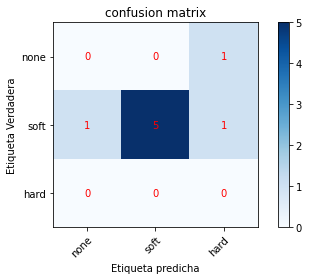

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[0 0 1]
 [1 5 1]
 [0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.71      0.83         7
           2       0.00      0.00      0.00         0

    accuracy                           0.62         8
   macro avg       0.33      0.24      0.28         8
weighted avg       0.88      0.62      0.73         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_test_contact = list(map(int, y_test_contact))
y_pred_contact = list(map(int, y_pred_contact))

class_names = ['none', 'soft', 'hard']
cm = confusion_matrix(y_test_contact, y_pred_contact)

plot_confusion_matrix(y_test_contact, y_pred_contact, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_test_contact, y_pred_contact, digits=2))


# **2. Crear un modelo usando Naive Bayes al conjunto de datos de IRIS.**

In [ ]:
#Reading the Cathegorical data:
#pd_weather = pd.read_csv('weka_dataset/weather.nominal.arff', sep=',', 
 #                        names=['outlook','temperature','humidity','windy','play'])

pd_iris = pd.read_csv('iris.csv')
X = pd_iris.values
y = pd_iris['species']

pd_iris

#print(X)
#print(y)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### a). Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
sepal_length_encoded=le.fit_transform(pd_iris['sepal_length'])
sepal_width_encoded = le.fit_transform(pd_iris['sepal_width'])
petal_length_encoded = le.fit_transform(pd_iris['petal_length'])
petal_width_encoded = le.fit_transform(pd_iris['petal_width'])
label = le.fit_transform(pd_iris['species'])

# Combining all dimensions of the dataset
features = list(zip(sepal_length_encoded, sepal_width_encoded, petal_length_encoded, petal_width_encoded))

print(features)

#Se parten los datos para usar 70 Entrenamiento y 30 test:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(features, label,
                                                    test_size=.3)

[(8, 14, 4, 1), (6, 9, 4, 1), (4, 11, 3, 1), (3, 10, 5, 1), (7, 15, 4, 1), (11, 18, 7, 3), (3, 13, 4, 2), (7, 13, 5, 1), (1, 8, 4, 1), (6, 10, 5, 0), (11, 16, 5, 1), (5, 13, 6, 1), (5, 9, 4, 0), (0, 9, 1, 0), (15, 19, 2, 1), (14, 22, 5, 3), (11, 18, 3, 3), (8, 14, 4, 2), (14, 17, 7, 2), (8, 17, 5, 2), (11, 13, 7, 1), (8, 16, 5, 3), (3, 15, 0, 1), (8, 12, 7, 4), (5, 13, 8, 1), (7, 9, 6, 1), (7, 13, 6, 3), (9, 14, 5, 1), (9, 13, 4, 1), (4, 11, 6, 1), (5, 10, 6, 1), (11, 13, 5, 3), (9, 20, 5, 0), (12, 21, 4, 1), (6, 10, 5, 0), (7, 11, 2, 1), (12, 14, 3, 1), (6, 10, 5, 0), (1, 9, 3, 1), (8, 13, 5, 1), (7, 14, 3, 2), (2, 2, 3, 2), (1, 11, 3, 1), (7, 14, 6, 5), (8, 17, 8, 3), (5, 9, 4, 2), (8, 17, 6, 1), (3, 11, 4, 1), (10, 16, 5, 1), (7, 12, 4, 1), (27, 11, 23, 10), (21, 11, 21, 11), (26, 10, 25, 11), (12, 2, 16, 9), (22, 7, 22, 11), (14, 7, 21, 9), (20, 12, 23, 12), (6, 3, 10, 6), (23, 8, 22, 9), (9, 6, 15, 10), (7, 0, 11, 6), (16, 9, 18, 11), (17, 1, 16, 6), (18, 8, 23, 10), (13, 8, 12, 9

#### b) Entrenar el modelo

In [ ]:
len(X_train_iris)

105

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
# De sklearn.naive_bayes importar GaussianNB, BernoulliNB, MultinomialNB  de acuerdo a los tipos de datos


#Create a Gaussian Classifier
model = CategoricalNB()
model.fit(X_train_iris, y_train_iris)

#Predicted output:
predicted = model.predict(X_train_iris)
print(predicted)

[2 0 2 1 0 2 1 2 1 1 2 0 2 2 1 0 0 2 2 1 2 2 2 2 2 0 1 2 0 1 2 1 0 0 2 2 0
 2 0 1 0 0 2 0 1 0 1 2 2 1 2 0 1 0 2 1 2 1 2 1 0 2 1 0 1 1 0 0 1 0 1 2 0 1
 2 0 0 0 1 0 1 0 2 1 1 1 1 0 2 0 1 2 2 2 2 2 1 0 2 2 2 1 2 1 1]


#### c) Aplicar el modelo al conjunto de test
	


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

y_pred_iris = model.predict(X_test_iris)

#### d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1

Se imprime la matriz de Confusión


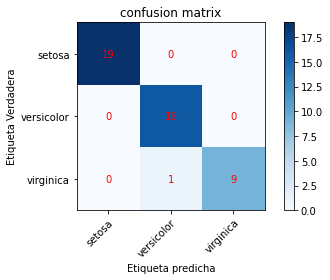

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[19  0  0]
 [ 0 16  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        16
           2       1.00      0.90      0.95        10

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_test_iris = list(map(int, y_test_iris))
y_pred_iris = list(map(int, y_pred_iris))

class_names = ['setosa', 'versicolor', 'virginica']
cm = confusion_matrix(y_test_iris, y_pred_iris)

plot_confusion_matrix(y_test_iris, y_pred_iris, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_test_iris, y_pred_iris, digits=2))

# **3. ¿Qué diferencias tienen los modelos Naive Bayes en cuanto al tipo de dato que manejan (discreto y continuo)?**

En general se puede ver como los modelos de Naive Bayes para datos continuos (Iris) arrojan mejores resultados en cuanto a medidadas de desempeño como: *precision, recall y la medida F*. Esto puede llegar a deberse a la precisión con el manejo de los datos continuos, los cuales representan valores puntuales. Por otra parte, para los datos continuos se genera una discretización y tan solo se miden frecuencias por categoría.

              Dataset ContactLenses                             Dataset Iris
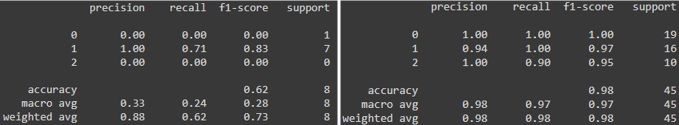

# **ÁRBOL DE DECISIÓN**

In [1]:
import pandas as pd
nba = pd.read_csv('nba.txt', sep=" ", header='infer')
print(nba)

        G    GS   MPG    FG%    3p%    FT%  ...  SPG  BPG   TO   PF   PPG  Class
0     362   223  24.4  0.466  0.405  0.800  ...  0.5  0.3  0.8  2.0   8.8      1
1      19     0  11.9  0.273  0.298  0.970  ...  0.4  0.0  1.2  1.4   4.6      1
2    1148  1140  36.9  0.452  0.400  0.894  ...  1.2  0.2  2.2  2.3  20.0      1
3     466   170  19.8  0.482  0.284  0.745  ...  1.2  0.4  1.4  2.2   7.8      1
4      38     1   9.5  0.381  0.292  0.743  ...  0.3  0.1  0.5  1.1   3.1      1
..    ...   ...   ...    ...    ...    ...  ...  ...  ...  ...  ...   ...    ...
303    14     0  12.0  0.414  0.000  0.478  ...  0.5  0.4  1.1  1.6   2.5      2
304    19     0   5.8  0.444  0.000  0.417  ...  0.2  0.8  0.3  0.7   1.5      2
305    43     5  14.7  0.507  0.000  0.652  ...  0.5  0.4  0.5  1.4   4.6      2
306   137    29  14.4  0.511  0.000  0.624  ...  0.3  1.2  0.9  2.4   4.2      2
307   361   104  15.5  0.462  0.222  0.740  ...  0.5  0.4  0.8  2.0   4.5      2

[308 rows x 16 columns]


In [2]:
pd.crosstab([nba['MPG'], nba['FG%']], nba['Class'])

Class       1  2
MPG  FG%        
4.5  0.357  1  0
5.1  0.515  0  1
5.8  0.444  0  1
5.9  0.290  0  1
6.1  0.477  0  1
...        .. ..
36.9 0.452  1  0
37.0 0.416  1  0
     0.472  1  0
37.2 0.486  1  0
37.7 0.461  1  0

[308 rows x 2 columns]

In [8]:
from sklearn import tree

Y = nba['Class']
X = nba.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

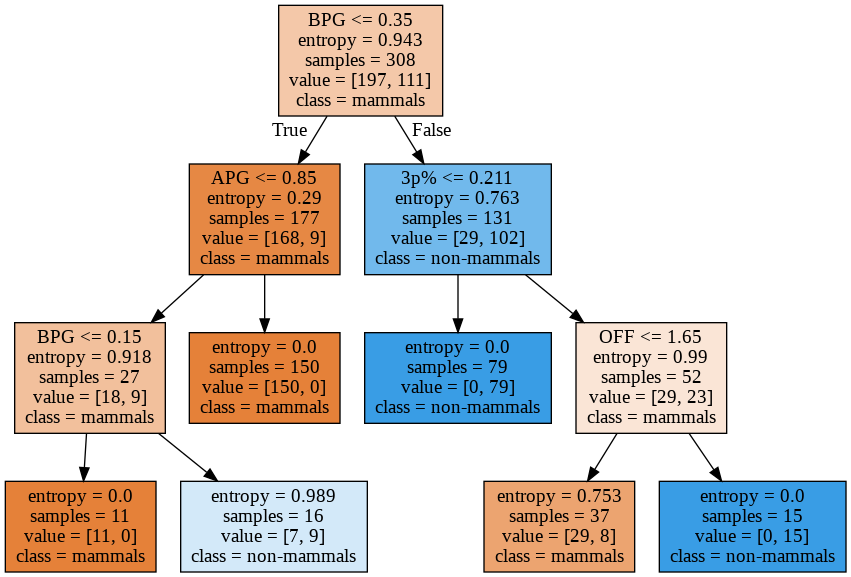

In [9]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'], filled= True,
                                out_file=None, ) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())